In [24]:
import pandas as pd

In [137]:
with open("runs.csv", "r",) as f:
    headers = f.readline().strip()[1:].split(",")
    units = f.readline().strip()[1:].split(",")
    types = f.readline().strip()[1:].split(",")
units = {h:u for h, u in zip(headers, units)}
types = {h:{"Boolean": bool, "String":str, "Float":float, "Datetime":str}[t] for h, t in zip(headers, types)}

In [138]:
df = pd.read_csv("runs.csv", sep=",", comment="#", dtype=types)
# df = df[df.VALID]
df.T_START = pd.to_datetime(df.T_START)#, format="%Y-%m-%dT%H:%M%z")
df.T_STOP = pd.to_datetime(df.T_STOP)#, format="%Y-%m-%dT%H:%M%z")
df.dtypes

FILE                                              object
VALID                                               bool
USE                                                 bool
COMMENT                                           object
T_START            datetime64[ns, pytz.FixedOffset(120)]
T_STOP             datetime64[ns, pytz.FixedOffset(120)]
N_RAMPS                                          float64
P_GUN_START                                      float64
P_GUN_STOP                                       float64
P_MAG_START                                      float64
P_MAG_STOP                                       float64
P_COLL_START                                     float64
P_COLL_STOP                                      float64
P_INJ1_START                                     float64
P_INJ1_STOP                                      float64
P_INJ2_START                                     float64
P_INJ2_STOP                                      float64
U_CATHODE                      

<AxesSubplot:xlabel='T_START'>

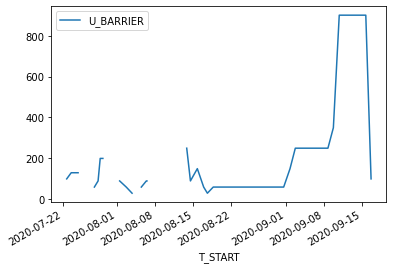

In [139]:
df.plot(x="T_START", y="U_BARRIER")

In [140]:
df[df.VALID]

,FILE,VALID,USE,COMMENT,T_START,T_STOP,N_RAMPS,P_GUN_START,P_GUN_STOP,P_MAG_START,...,TAU_RAMP,I_BEAM,U_HEAT,I_HEAT,U_BUCKING_COIL,I_BUCKING_COIL,U_COLL_COIL,I_COLL_COIL,B_MAGNET_FRINGE,I_MAGNET
7,Fe_DR_008.lst,True,False,First long measurement; Problems with Spectros...,2020-07-22 17:53:00+02:00,2020-07-23 10:43:00+02:00,505.000,1.900000e-09,1.620000e-09,1.440000e-08,...,120.000000,0.0184,8.25,1.23,2.2,6.7,4.5,8.2,-0.1935,99.9
11,Fe_DR_012.lst,True,False,First measurement with time encoding; bidirect...,2020-07-23 13:40:00+02:00,2020-07-23 18:05:00+02:00,126.500,1.700000e-09,NaN,9.200000e-09,...,125.663700,0.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Fe_DR_014.lst,True,False,Activated active dumping script on Trap DT; N_...,2020-07-23 18:38:00+02:00,2020-07-24 11:00:00+02:00,28.000,1.750000e-09,NaN,8.900000e-09,...,2094.395100,0.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Fe_DR_016.lst,True,False,"Bidirectional ramp, Active dump 200ms, 100ms a...",2020-07-24 12:07:00+02:00,2020-07-24 16:46:00+02:00,8.000,1.600000e-09,NaN,6.990000e-09,...,2094.395100,0.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Fe_DR_018.lst,True,True,"First clean scan; Active dump 1000ms, 50ms aft...",2020-07-24 20:08:00+02:00,2020-07-25 19:26:00+02:00,20.000,1.660000e-09,1.630000e-09,6.410000e-09,...,4188.790205,0.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Fe_DR_019.lst,True,True,NaN,2020-07-25 19:50:00+02:00,2020-07-26 20:17:00+02:00,21.000,1.630000e-09,1.470000e-09,5.300000e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Fe_DR_020.lst,True,True,NaN,2020-07-26 20:27:00+02:00,2020-07-27 19:42:00+02:00,20.000,1.460000e-09,1.530000e-09,4.250000e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Fe_DR_021.lst,True,True,NaN,2020-07-27 19:53:00+02:00,2020-07-28 12:10:00+02:00,14.000,1.500000e-09,1.400000e-09,3.700000e-09,...,4188.790205,0.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Fe_DR_022.lst,True,True,NaN,2020-07-28 12:15:00+02:00,2020-07-28 21:33:00+02:00,8.000,1.390000e-09,1.420000e-09,3.160000e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Fe_DR_023.lst,True,True,NaN,2020-07-28 21:35:00+02:00,2020-07-29 09:13:00+02:00,10.000,1.420000e-09,1.250000e-09,2.980000e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
def read_orchestration_csv(filename, fill_gaps=True):
    _FILL_COLS = [
        "U_CATHODE",
        "U_FOCUS_ON",
        "U_FOCUS_OFF",
        "U_TRAP",
        "U_BARRIER",
        "U_DUMP_PULSE",
        "U_DT_LOW",
        "U_DT_HIGH",
        "TAU_BREED",
        "TAU_DUMP",
        "TAU_RAMP",
        "I_BEAM",
        "U_HEAT",
        "I_HEAT",
        "U_BUCKING_COIL",
        "I_BUCKING_COIL",
        "U_COLL_COIL",
        "I_COLL_COIL",
    ]
    with open(filename, "r",) as f:
        headers = f.readline().strip()[1:].split(",")
        units = f.readline().strip()[1:].split(",")
        types = f.readline().strip()[1:].split(",")
    
    units = {h:u for h, u in zip(headers, units)}
    types = {h:{"Boolean": bool, "String":str, "Float":float, "Datetime":str}[t] for h, t in zip(headers, types)}
    
    df = pd.read_csv(filename, sep=",", comment="#", dtype=types)
    df.T_START = pd.to_datetime(df.T_START)#, format="%Y-%m-%dT%H:%M%z")
    df.T_STOP = pd.to_datetime(df.T_STOP)#, format="%Y-%m-%dT%H:%M%z")
    if fill_gaps:
        for col in _FILL_COLS:
            df[col].fillna(method="ffill", inplace=True)
    return df

In [155]:
df = read_orchestration_csv("runs.csv")
df[df.VALID]

,FILE,VALID,USE,COMMENT,T_START,T_STOP,N_RAMPS,P_GUN_START,P_GUN_STOP,P_MAG_START,...,TAU_RAMP,I_BEAM,U_HEAT,I_HEAT,U_BUCKING_COIL,I_BUCKING_COIL,U_COLL_COIL,I_COLL_COIL,B_MAGNET_FRINGE,I_MAGNET
7,Fe_DR_008.lst,True,False,First long measurement; Problems with Spectros...,2020-07-22 17:53:00+02:00,2020-07-23 10:43:00+02:00,505.000,1.900000e-09,1.620000e-09,1.440000e-08,...,120.000000,0.0184,8.25,1.23,2.2,6.7,4.5,8.2,-0.1935,99.9
11,Fe_DR_012.lst,True,False,First measurement with time encoding; bidirect...,2020-07-23 13:40:00+02:00,2020-07-23 18:05:00+02:00,126.500,1.700000e-09,NaN,9.200000e-09,...,125.663700,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
13,Fe_DR_014.lst,True,False,Activated active dumping script on Trap DT; N_...,2020-07-23 18:38:00+02:00,2020-07-24 11:00:00+02:00,28.000,1.750000e-09,NaN,8.900000e-09,...,2094.395100,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
15,Fe_DR_016.lst,True,False,"Bidirectional ramp, Active dump 200ms, 100ms a...",2020-07-24 12:07:00+02:00,2020-07-24 16:46:00+02:00,8.000,1.600000e-09,NaN,6.990000e-09,...,2094.395100,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
17,Fe_DR_018.lst,True,True,"First clean scan; Active dump 1000ms, 50ms aft...",2020-07-24 20:08:00+02:00,2020-07-25 19:26:00+02:00,20.000,1.660000e-09,1.630000e-09,6.410000e-09,...,4188.790205,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
18,Fe_DR_019.lst,True,True,NaN,2020-07-25 19:50:00+02:00,2020-07-26 20:17:00+02:00,21.000,1.630000e-09,1.470000e-09,5.300000e-09,...,4188.790205,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
19,Fe_DR_020.lst,True,True,NaN,2020-07-26 20:27:00+02:00,2020-07-27 19:42:00+02:00,20.000,1.460000e-09,1.530000e-09,4.250000e-09,...,4188.790205,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
20,Fe_DR_021.lst,True,True,NaN,2020-07-27 19:53:00+02:00,2020-07-28 12:10:00+02:00,14.000,1.500000e-09,1.400000e-09,3.700000e-09,...,4188.790205,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
21,Fe_DR_022.lst,True,True,NaN,2020-07-28 12:15:00+02:00,2020-07-28 21:33:00+02:00,8.000,1.390000e-09,1.420000e-09,3.160000e-09,...,4188.790205,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
22,Fe_DR_023.lst,True,True,NaN,2020-07-28 21:35:00+02:00,2020-07-29 09:13:00+02:00,10.000,1.420000e-09,1.250000e-09,2.980000e-09,...,4188.790205,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN


In [156]:
" ".join(df.FILE[df.VALID])

'Fe_DR_008.lst Fe_DR_012.lst Fe_DR_014.lst Fe_DR_016.lst Fe_DR_018.lst Fe_DR_019.lst Fe_DR_020.lst Fe_DR_021.lst Fe_DR_022.lst Fe_DR_023.lst Fe_DR_024.lst Fe_DR_025.lst Fe_DR_026.lst Fe_DR_027.lst Fe_DR_028.lst Fe_DR_029.lst Fe_DR_030.lst Fe_DR_031.lst Fe_DR_032.lst Fe_DR_033.lst Fe_DR_034.lst Fe_DR_035.lst Fe_DR_036.lst Fe_DR_037.lst Fe_DR_038.lst Fe_DR_043.lst Fe_DR_044.lst Fe_DR_045.lst Fe_DR_046.lst Fe_DR_047.lst Fe_DR_048.lst Fe_DR_053.lst Fe_DR_055.lst Fe_DR_056.lst Fe_DR_057.lst Fe_DR_059.lst Fe_DR_060.lst Fe_DR_062.lst Fe_DR_063.lst Fe_DR_064.lst Fe_DR_065.lst Fe_DR_068.lst Fe_DR_069.lst Fe_DR_105.lst Fe_DR_107.lst Fe_DR_111.lst Fe_DR_112.lst Fe_DR_113.lst Fe_DR_114.lst'

In [175]:
# df.iloc[df.FILE=="Fe_DR_113.lst"]
df = df.set_index("FILE")
df.loc["Fe_DR_113.lst"]
# df.iloc[22]
# dict(df.loc[df.FILE=="Fe_DR_113.lst"])

VALID                                   True
USE                                     True
COMMENT                                  NaN
T_START            2020-09-23 16:20:00+02:00
T_STOP             2020-09-23 18:29:00+02:00
N_RAMPS                                    1
P_GUN_START                         1.28e-09
P_GUN_STOP                           1.3e-09
P_MAG_START                            5e-10
P_MAG_STOP                             5e-10
P_COLL_START                           7e-10
P_COLL_STOP                          7.5e-10
P_INJ1_START                         4.7e-08
P_INJ1_STOP                            4e-08
P_INJ2_START                         1.1e-08
P_INJ2_STOP                          1.1e-08
U_CATHODE                              -2000
U_FOCUS_ON                              -500
U_FOCUS_OFF                            -2500
U_TRAP                                   400
U_BARRIER                                450
BARRIER_RAMP                           False
U_DUMP_PUL

In [158]:
type(dict(df.iloc[22])["T_START"])

pandas._libs.tslibs.timestamps.Timestamp

In [179]:
from _common import read_orchestration_csv
df2 = read_orchestration_csv("runs.csv")

In [180]:
# df == df2

In [181]:
df2[df2.VALID]


,FILE,VALID,USE,COMMENT,T_START,T_STOP,N_RAMPS,P_GUN_START,P_GUN_STOP,P_MAG_START,...,TAU_RAMP,I_BEAM,U_HEAT,I_HEAT,U_BUCKING_COIL,I_BUCKING_COIL,U_COLL_COIL,I_COLL_COIL,B_MAGNET_FRINGE,I_MAGNET
7,Fe_DR_008.lst,True,False,First long measurement; Problems with Spectros...,2020-07-22 17:53:00+02:00,2020-07-23 10:43:00+02:00,505.000,1.900000e-09,1.620000e-09,1.440000e-08,...,120.000000,0.0184,8.25,1.23,2.2,6.7,4.5,8.2,-0.1935,99.9
11,Fe_DR_012.lst,True,False,First measurement with time encoding; bidirect...,2020-07-23 13:40:00+02:00,2020-07-23 18:05:00+02:00,126.500,1.700000e-09,NaN,9.200000e-09,...,125.663700,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
13,Fe_DR_014.lst,True,False,Activated active dumping script on Trap DT; N_...,2020-07-23 18:38:00+02:00,2020-07-24 11:00:00+02:00,28.000,1.750000e-09,NaN,8.900000e-09,...,2094.395100,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
15,Fe_DR_016.lst,True,False,"Bidirectional ramp, Active dump 200ms, 100ms a...",2020-07-24 12:07:00+02:00,2020-07-24 16:46:00+02:00,8.000,1.600000e-09,NaN,6.990000e-09,...,2094.395100,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
17,Fe_DR_018.lst,True,True,"First clean scan; Active dump 1000ms, 50ms aft...",2020-07-24 20:08:00+02:00,2020-07-25 19:26:00+02:00,20.000,1.660000e-09,1.630000e-09,6.410000e-09,...,4188.790205,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
18,Fe_DR_019.lst,True,True,NaN,2020-07-25 19:50:00+02:00,2020-07-26 20:17:00+02:00,21.000,1.630000e-09,1.470000e-09,5.300000e-09,...,4188.790205,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
19,Fe_DR_020.lst,True,True,NaN,2020-07-26 20:27:00+02:00,2020-07-27 19:42:00+02:00,20.000,1.460000e-09,1.530000e-09,4.250000e-09,...,4188.790205,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
20,Fe_DR_021.lst,True,True,NaN,2020-07-27 19:53:00+02:00,2020-07-28 12:10:00+02:00,14.000,1.500000e-09,1.400000e-09,3.700000e-09,...,4188.790205,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
21,Fe_DR_022.lst,True,True,NaN,2020-07-28 12:15:00+02:00,2020-07-28 21:33:00+02:00,8.000,1.390000e-09,1.420000e-09,3.160000e-09,...,4188.790205,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN
22,Fe_DR_023.lst,True,True,NaN,2020-07-28 21:35:00+02:00,2020-07-29 09:13:00+02:00,10.000,1.420000e-09,1.250000e-09,2.980000e-09,...,4188.790205,0.0700,8.25,1.23,2.2,6.7,4.5,8.2,NaN,NaN


<AxesSubplot:xlabel='T_START'>

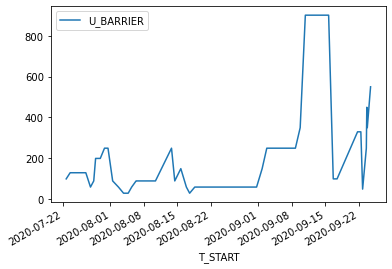

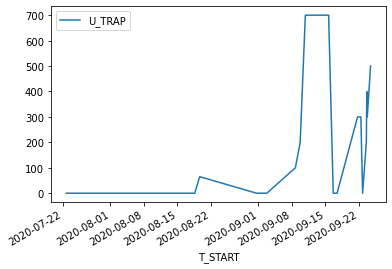

In [182]:
df2.plot(x="T_START", y="U_BARRIER")
df2.plot(x="T_START", y="U_TRAP")

<AxesSubplot:xlabel='T_START'>

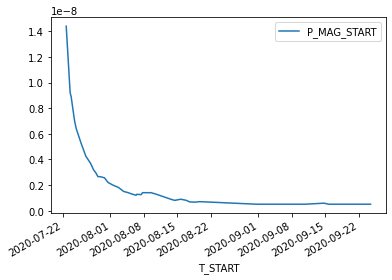

In [184]:
df2.plot(x="T_START", y="P_MAG_START")

In [185]:
df2.COMMENT

0      Trials
1      Trials
2      Trials
3      Trials
4      Trials
        ...  
115       NaN
116       NaN
117       NaN
118       NaN
119       NaN
Name: COMMENT, Length: 120, dtype: object